AZUR WITH PYTHON

https://learn.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?tabs=managed-identity%2Croles-azure-portal%2Csign-in-azure-cli&pivots=blob-storage-quickstart-scratch

Azure Blob Storage is optimized for storing massive amounts of unstructured data. Unstructured data is data that doesn't adhere to a particular data model or definition, such as text or binary data. Blob storage offers three types of resources:

. The storage account
    . container in the storage account

        . A blob in the container

In [16]:
#Step 1
# install the packages

!pip install azure-storage-blob azure-identity

Use the following Python classes to interact with these resources:

. BlobServiceClient: The BlobServiceClient class allows you to manipulate Azure Storage resources and blob containers.

. ContainerClient: The ContainerClient class allows you to manipulate Azure Storage containers and their blobs.

. BlobClient: The BlobClient class allows you to manipulate Azure Storage blobs.

Create a new container in your storage account by calling the create_container method on the blob_service_client object

. we need to access azure account

. we need to access the corresponding sotrage details

. BlobServiceClient Expecting two arguments

    . account_url

    . credential

In [1]:
from azure.storage.blob import BlobServiceClient

In [ ]:
blob_account_url = 'https://xxxxxx.blob.core.windows.net' #enter a valid container name before .blob in this url
storage_credential = 'Download the Access key from the Azure portal and use it in this place'

blob_service_client = BlobServiceClient(account_url = blob_account_url, credential = storage_credential)
blob_service_client

Method-1

we will create the container using blob service client

In [4]:
#Create the container

new_container = blob_service_client.create_container("vscodecontainer", public_access="container")
new_container

In [5]:
new_container.get_container_properties()

{'name': 'vscodecontainer', 'last_modified': datetime.datetime(2024, 11, 28, 3, 54, 11, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F60515EAC4D"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': {}, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x0000024E88C660F0>, 'immutable_storage_with_versioning_enabled': False}

In [6]:
#List out all containers

all_containers = blob_service_client.list_containers()
all_containers

<iterator object azure.core.paging.ItemPaged at 0x24e88c66600>

In [7]:
for container in all_containers:
    print(container)

{'name': 'cloud', 'last_modified': datetime.datetime(2024, 11, 28, 3, 30, 28, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F5D01112CE6"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x0000024E88AF24B0>, 'immutable_storage_with_versioning_enabled': False}
{'name': 'imagecontainer', 'last_modified': datetime.datetime(2024, 11, 28, 3, 38, 7, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F5E13319ABE"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x0000024E88F1FEC0>, 'immutable_storage_with_

In [8]:
all_containers = blob_service_client.list_containers()
list(all_containers)

[{'name': 'cloud', 'last_modified': datetime.datetime(2024, 11, 28, 3, 30, 28, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F5D01112CE6"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x0000024E88FAF560>, 'immutable_storage_with_versioning_enabled': False},
 {'name': 'imagecontainer', 'last_modified': datetime.datetime(2024, 11, 28, 3, 38, 7, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0F5E13319ABE"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x0000024E88FAF140>, 'immutable_storage_wi

In [9]:
#Delete the container

all_containers = blob_service_client.list_containers()
for container in all_containers:
    print("deleting:", 'vscodecontainer')
    blob_service_client.delete_container('vscodecontainer')

deleting: vscodecontainer
deleting: vscodecontainer
deleting: vscodecontainer


. In above we cretaed a Container

. we list out all containers

. we deleted containers

Upload a blob

. we deleted all containers

. So create one container

. upload a blob in that container

. access the blob from container

Upload a Blob

In [ ]:
#create a new container

blob_account_url = 'https://azureaiml.blob.core.windows.net'
storage_credential = 'UerY2ufwRTskSB91IZ1AJrZCePQk57l9QNGk/D0drhjVcdAVeOVJ1fAMzQTKa0EOg/a50PVTh5hs+AStabPdlw=='

blob_service_client = BlobServiceClient(account_url = blob_account_url, credential = storage_credential)
new_container = blob_service_client.create_container('createcontainer', public_access= 'container')
new_container

In [21]:
#text file

#Create a BlobClient instance for the specified blob

blob_name = 'Sample.txt'
file_path = r"C:\Users\ShreeSai\VSCode\Deep_Learning\Azure\Azure Blob Storage with Python\sample.txt"
container_client = blob_service_client.get_container_client("createcontainer")
blob_client = container_client.get_blob_client(blob_name)

#upload the file to the blob
with open(file_path, "rb") as data:
    blob_client.upload_blob(data, overwrite = True)

In [12]:
#csv file

blob_name = 'Churn Model.csv'
file_path = r"D:\DS & AI\Nov'24\15th Nov'24\15th, 16th - ANN THEORY, Installation\Practicle - CPU\ANN_ 1st\Churn_Modelling.csv"
container_client = blob_service_client.get_container_client("createcontainer")
blob_client = container_client.get_blob_client(blob_name)

#upload the file to the blob
with open(file_path, "rb") as data:
    blob_client.upload_blob(data, overwrite = True)


In [14]:
#Image file

blob_name = 'Lotus.jfif'
file_path = r"C:\Users\ShreeSai\Desktop\Lotus3.jfif"
container_client = blob_service_client.get_container_client("createcontainer")
blob_client = container_client.get_blob_client(blob_name)

#upload the file to the blob
with open(file_path, "rb") as data:
    blob_client.upload_blob(data, overwrite = True)


Access the Blobs

In [23]:
#Get all blobs

container_client = blob_service_client.get_container_client('createcontainer')
for blob in container_client.list_blobs():
    print(blob)

{'name': 'Churn Model.csv', 'container': 'createcontainer', 'snapshot': None, 'version_id': None, 'is_current_version': None, 'blob_type': <BlobType.BLOCKBLOB: 'BlockBlob'>, 'metadata': {}, 'encrypted_metadata': None, 'last_modified': datetime.datetime(2024, 11, 28, 4, 12, 57, tzinfo=datetime.timezone.utc), 'etag': '0x8DD0F62F06F4F5E', 'size': 684858, 'content_range': None, 'append_blob_committed_block_count': None, 'is_append_blob_sealed': None, 'page_blob_sequence_number': None, 'server_encrypted': True, 'copy': {'id': None, 'source': None, 'status': None, 'progress': None, 'completion_time': None, 'status_description': None, 'incremental_copy': None, 'destination_snapshot': None}, 'content_settings': {'content_type': 'application/octet-stream', 'content_encoding': None, 'content_language': None, 'content_md5': bytearray(b'Ij\xee\x8f\xbf\xdf\xa1\xdf\xb6\xda\xa9\xdb\xca]\x1a\x01'), 'content_disposition': None, 'cache_control': None}, 'lease': {'status': 'unlocked', 'state': 'available

In [22]:
#Access Text Data

blob_client=blob_service_client.get_blob_client('createcontainer','Sample.txt')
data=blob_client.download_blob()
import pandas as pd
pd.read_csv(data)

,**Artificial Intelligence (AI)** refers to the simulation of human intelligence in machines that are programmed to think,learn,and solve problems. AI is an interdisciplinary field that draws from computer science,mathematics,cognitive science,and other areas. It can be classified into two broad categories:
0,### 1. **Narrow AI (Weak AI)**,NaN,NaN,NaN,NaN,NaN
1,This type of AI is designed to perform a speci...,such as:,NaN,NaN,NaN,NaN
2,- **Voice Assistants** like Siri or Alexa,NaN,NaN,NaN,NaN,NaN
3,- **Recommendation Systems** (e.g.,Netflix or Amazon recommendations),NaN,NaN,NaN,NaN
4,- **Image Recognition** (e.g.,facial recognition),NaN,NaN,NaN,NaN
5,- **Autonomous Vehicles** (self-driving cars),NaN,NaN,NaN,NaN,NaN
6,### 2. **General AI (Strong AI)**,NaN,NaN,NaN,NaN,NaN
7,This hypothetical form of AI would have the ab...,learn,and apply intelligence across a wide range of...,much like a human. General AI would not be re...,it is the subject of ongoing research.,NaN
8,---,NaN,NaN,NaN,NaN,NaN
9,### Key Concepts in AI,NaN,NaN,NaN,NaN,NaN


In [18]:
#Access csv data

blob_client = blob_service_client.get_blob_client('createcontainer', 'Churn Model.csv')
data = blob_client.download_blob()
import pandas as pd
pd.read_csv(data)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


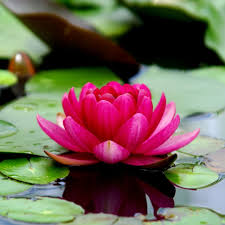

In [19]:
#Access Image Data

blob_client=blob_service_client.get_blob_client('createcontainer','Lotus.jfif')
data=blob_client.download_blob()
from PIL import Image
Image.open(data)